#Prova de Inteligência Artificial

## Pré-Processamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import cluster,neighbors,svm,metrics,preprocessing
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering



In [ ]:
dog_breed = pd.read_csv("/content/akc-data-latest.csv")

In [ ]:
dog_breed.columns

Index(['Unnamed: 0', 'description', 'temperament', 'popularity', 'min_height',
       'max_height', 'min_weight', 'max_weight', 'min_expectancy',
       'max_expectancy', 'group', 'grooming_frequency_value',
       'grooming_frequency_category', 'shedding_value', 'shedding_category',
       'energy_level_value', 'energy_level_category', 'trainability_value',
       'trainability_category', 'demeanor_value', 'demeanor_category'],
      dtype='object')

In [ ]:
# Contar os valores NaN em todas as colunas
count_nan = dog_breed.isna().sum()
print(count_nan)

Unnamed: 0                      0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                           0
grooming_frequency_value        7
grooming_frequency_category     7
shedding_value                 20
shedding_category              20
energy_level_value              6
energy_level_category           6
trainability_value             24
trainability_category          24
demeanor_value                 25
demeanor_category              25
dtype: int64


In [ ]:
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   277 non-null    object 
 1   description                  277 non-null    object 
 2   temperament                  276 non-null    object 
 3   popularity                   198 non-null    object 
 4   min_height                   277 non-null    float64
 5   max_height                   277 non-null    float64
 6   min_weight                   275 non-null    float64
 7   max_weight                   275 non-null    float64
 8   min_expectancy               274 non-null    float64
 9   max_expectancy               274 non-null    float64
 10  group                        277 non-null    object 
 11  grooming_frequency_value     270 non-null    float64
 12  grooming_frequency_category  270 non-null    object 
 13  shedding_value      

In [ ]:
for coluna in dog_breed.columns:
  if dog_breed[coluna].dtype == np.float64:
        # Operação para coluna de tipo float
        # Arredondar para 1 casa decimal
        media = dog_breed[coluna].mean()
        dog_breed[coluna].fillna(media, inplace=True)
        dog_breed[coluna] = dog_breed[coluna].round(1)

In [ ]:
count_nan = dog_breed.isna().sum()
print(count_nan)

Unnamed: 0                      0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      0
max_weight                      0
min_expectancy                  0
max_expectancy                  0
group                           0
grooming_frequency_value        0
grooming_frequency_category     7
shedding_value                  0
shedding_category              20
energy_level_value              0
energy_level_category           6
trainability_value              0
trainability_category          24
demeanor_value                  0
demeanor_category              25
dtype: int64


In [ ]:
# Substituir valores NaN pela moda das colunas
for coluna in dog_breed.columns:
    moda = dog_breed[coluna].mode()[0]  # Obtém o valor da moda da coluna
    dog_breed[coluna].fillna(moda, inplace=True)

In [ ]:
count_nan = dog_breed.isna().sum()
print(count_nan)

Unnamed: 0                     0
description                    0
temperament                    0
popularity                     0
min_height                     0
max_height                     0
min_weight                     0
max_weight                     0
min_expectancy                 0
max_expectancy                 0
group                          0
grooming_frequency_value       0
grooming_frequency_category    0
shedding_value                 0
shedding_category              0
energy_level_value             0
energy_level_category          0
trainability_value             0
trainability_category          0
demeanor_value                 0
demeanor_category              0
dtype: int64


In [ ]:
# convertendo variáveis categóricas em valores numéricos
le = preprocessing.LabelEncoder()
for colums in dog_breed.columns:
  if dog_breed[colums].dtypes == 'object':
    dog_breed[colums] = le.fit_transform(dog_breed[colums])

dog_breed

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,0,148,78,53,22.9,29.2,3.2,4.5,12.0,15.0,...,0.6,0,0.6,4,0.6,4,0.8,2,1.0,3
1,1,149,102,16,63.5,68.6,22.7,27.2,12.0,15.0,...,0.8,1,0.2,1,0.8,2,0.2,4,0.2,1
2,2,150,131,147,58.4,58.4,22.7,31.8,11.0,14.0,...,0.6,0,0.4,2,0.6,4,1.0,1,0.8,2
3,3,14,92,132,61.0,71.1,31.8,59.0,10.0,13.0,...,0.8,1,0.6,4,0.8,2,1.0,1,0.6,0
4,4,151,31,144,58.4,63.5,34.0,38.6,10.0,14.0,...,0.6,0,0.6,4,0.8,2,0.4,3,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,272,268,172,73,54.6,63.5,20.4,29.5,12.0,14.0,...,0.2,2,0.6,4,0.8,2,0.6,0,0.6,0
273,273,249,50,157,48.3,63.5,12.7,27.2,12.0,15.0,...,0.2,2,0.6,4,0.8,2,0.4,3,0.6,0
274,274,235,202,45,25.4,58.4,4.5,24.9,13.0,18.0,...,0.2,2,0.2,1,0.8,2,0.6,0,0.6,0
275,275,71,22,157,53.3,58.4,18.1,24.9,10.0,12.0,...,0.4,4,0.6,4,0.8,2,0.2,4,0.4,4


In [ ]:

corr= dog_breed.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
Unnamed: 0,1.000000,0.158582,0.008614,-0.026700,-0.148031,-0.106070,-0.100067,-0.085394,0.074081,0.061076,0.005180,-0.009193,0.132864,-0.097335,0.074371,-0.026419,0.044801,-0.127397,0.035213,0.000141,-0.035643
description,0.158582,1.000000,0.028390,0.062839,-0.034325,-0.001102,-0.012825,-0.029938,-0.073655,-0.026032,-0.137498,-0.042822,0.004555,0.003884,0.016288,0.054308,-0.086319,0.001749,-0.118040,-0.006497,-0.077454
temperament,0.008614,0.028390,1.000000,-0.082162,0.050478,0.088178,0.046115,0.060114,0.066499,-0.020309,-0.095497,-0.023111,0.059087,0.014140,0.041330,0.026516,0.069133,-0.005968,0.042401,-0.054381,0.030157
popularity,-0.026700,0.062839,-0.082162,1.000000,0.077736,0.104323,0.120285,0.110628,0.006127,-0.008621,-0.270215,-0.096218,-0.059271,0.083600,0.056920,-0.079931,0.004181,0.019641,-0.045387,-0.034163,0.061268
min_height,-0.148031,-0.034325,0.050478,0.077736,1.000000,0.935148,0.814228,0.791482,-0.458767,-0.461915,-0.132754,-0.184097,0.091935,0.275945,0.210104,0.173007,-0.197062,-0.050571,0.107558,-0.232845,-0.041095
max_height,-0.106070,-0.001102,0.088178,0.104323,0.935148,1.000000,0.791596,0.804986,-0.440107,-0.465931,-0.187046,-0.241101,0.121774,0.311356,0.224263,0.197276,-0.222859,-0.053701,0.110897,-0.286476,0.009516
min_weight,-0.100067,-0.012825,0.046115,0.120285,0.814228,0.791596,1.000000,0.947596,-0.537438,-0.547328,-0.051937,-0.135119,0.035268,0.280963,0.214292,-0.071118,-0.209597,-0.125591,0.067165,-0.258876,-0.022369
max_weight,-0.085394,-0.029938,0.060114,0.110628,0.791482,0.804986,0.947596,1.000000,-0.511211,-0.520251,-0.049966,-0.113667,0.020803,0.277987,0.204285,-0.075190,-0.240095,-0.072266,0.030516,-0.252396,-0.016732
min_expectancy,0.074081,-0.073655,0.066499,0.006127,-0.458767,-0.440107,-0.537438,-0.511211,1.000000,0.765434,-0.080560,0.029417,-0.047430,-0.245301,-0.116107,-0.000033,0.045064,0.089522,0.023932,0.175830,0.048118
max_expectancy,0.061076,-0.026032,-0.020309,-0.008621,-0.461915,-0.465931,-0.547328,-0.520251,0.765434,1.000000,0.006425,0.124519,-0.046957,-0.348894,-0.212441,0.011988,0.117044,0.091731,-0.012819,0.162902,0.003351


#Questão 2

####O atributo de entrada escolhido para ser o atributo de saída foi o *demeanor_category*, pois a característica do comportamento dos cachorros é frequentemente uma informação importante e relevante para muitas pessoas. Além disso, algumas pessoas preferem raças mais calmas e dóceis, enquanto outras preferem raças mais ativas e enérgicas.

#Questão 3

In [ ]:
corr= dog_breed.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
Unnamed: 0,1.000000,0.158582,0.008614,-0.026700,-0.148031,-0.106070,-0.100067,-0.085394,0.074081,0.061076,0.005180,-0.009193,0.132864,-0.097335,0.074371,-0.026419,0.044801,-0.127397,0.035213,0.000141,-0.035643
description,0.158582,1.000000,0.028390,0.062839,-0.034325,-0.001102,-0.012825,-0.029938,-0.073655,-0.026032,-0.137498,-0.042822,0.004555,0.003884,0.016288,0.054308,-0.086319,0.001749,-0.118040,-0.006497,-0.077454
temperament,0.008614,0.028390,1.000000,-0.082162,0.050478,0.088178,0.046115,0.060114,0.066499,-0.020309,-0.095497,-0.023111,0.059087,0.014140,0.041330,0.026516,0.069133,-0.005968,0.042401,-0.054381,0.030157
popularity,-0.026700,0.062839,-0.082162,1.000000,0.077736,0.104323,0.120285,0.110628,0.006127,-0.008621,-0.270215,-0.096218,-0.059271,0.083600,0.056920,-0.079931,0.004181,0.019641,-0.045387,-0.034163,0.061268
min_height,-0.148031,-0.034325,0.050478,0.077736,1.000000,0.935148,0.814228,0.791482,-0.458767,-0.461915,-0.132754,-0.184097,0.091935,0.275945,0.210104,0.173007,-0.197062,-0.050571,0.107558,-0.232845,-0.041095
max_height,-0.106070,-0.001102,0.088178,0.104323,0.935148,1.000000,0.791596,0.804986,-0.440107,-0.465931,-0.187046,-0.241101,0.121774,0.311356,0.224263,0.197276,-0.222859,-0.053701,0.110897,-0.286476,0.009516
min_weight,-0.100067,-0.012825,0.046115,0.120285,0.814228,0.791596,1.000000,0.947596,-0.537438,-0.547328,-0.051937,-0.135119,0.035268,0.280963,0.214292,-0.071118,-0.209597,-0.125591,0.067165,-0.258876,-0.022369
max_weight,-0.085394,-0.029938,0.060114,0.110628,0.791482,0.804986,0.947596,1.000000,-0.511211,-0.520251,-0.049966,-0.113667,0.020803,0.277987,0.204285,-0.075190,-0.240095,-0.072266,0.030516,-0.252396,-0.016732
min_expectancy,0.074081,-0.073655,0.066499,0.006127,-0.458767,-0.440107,-0.537438,-0.511211,1.000000,0.765434,-0.080560,0.029417,-0.047430,-0.245301,-0.116107,-0.000033,0.045064,0.089522,0.023932,0.175830,0.048118
max_expectancy,0.061076,-0.026032,-0.020309,-0.008621,-0.461915,-0.465931,-0.547328,-0.520251,0.765434,1.000000,0.006425,0.124519,-0.046957,-0.348894,-0.212441,0.011988,0.117044,0.091731,-0.012819,0.162902,0.003351


A alta correlação entre colunas em um DataFrame pode indicar uma dependência ou relação significativa entre essas variáveis. Isso pode ser útil para identificar padrões, realizar análises exploratórias de dados e construir modelos preditivos. Além disso, uma alta correlação pode indicar redundância de informações, ou seja, quando duas colunas têm uma alta correlação, isso pode indicar que ambas fornecem informações semelhantes. Nesse caso, pode ser possível remover uma das colunas sem perda significativa de informações, reduzindo a complexidade do DataFrame.

In [ ]:
dog_breed_new= dog_breed

dog_breed_new = dog_breed_new.rename(columns={'Unnamed: 0': 'breed'})
dog_breed_new = dog_breed_new.drop('min_height', axis=1)
dog_breed_new = dog_breed_new.drop('min_weight', axis=1)
corr2 = dog_breed_new.corr()
corr2.style.background_gradient(cmap='coolwarm')

,breed,description,temperament,popularity,max_height,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
breed,1.000000,0.158582,0.008614,-0.026700,-0.106070,-0.085394,0.074081,0.061076,0.005180,-0.009193,0.132864,-0.097335,0.074371,-0.026419,0.044801,-0.127397,0.035213,0.000141,-0.035643
description,0.158582,1.000000,0.028390,0.062839,-0.001102,-0.029938,-0.073655,-0.026032,-0.137498,-0.042822,0.004555,0.003884,0.016288,0.054308,-0.086319,0.001749,-0.118040,-0.006497,-0.077454
temperament,0.008614,0.028390,1.000000,-0.082162,0.088178,0.060114,0.066499,-0.020309,-0.095497,-0.023111,0.059087,0.014140,0.041330,0.026516,0.069133,-0.005968,0.042401,-0.054381,0.030157
popularity,-0.026700,0.062839,-0.082162,1.000000,0.104323,0.110628,0.006127,-0.008621,-0.270215,-0.096218,-0.059271,0.083600,0.056920,-0.079931,0.004181,0.019641,-0.045387,-0.034163,0.061268
max_height,-0.106070,-0.001102,0.088178,0.104323,1.000000,0.804986,-0.440107,-0.465931,-0.187046,-0.241101,0.121774,0.311356,0.224263,0.197276,-0.222859,-0.053701,0.110897,-0.286476,0.009516
max_weight,-0.085394,-0.029938,0.060114,0.110628,0.804986,1.000000,-0.511211,-0.520251,-0.049966,-0.113667,0.020803,0.277987,0.204285,-0.075190,-0.240095,-0.072266,0.030516,-0.252396,-0.016732
min_expectancy,0.074081,-0.073655,0.066499,0.006127,-0.440107,-0.511211,1.000000,0.765434,-0.080560,0.029417,-0.047430,-0.245301,-0.116107,-0.000033,0.045064,0.089522,0.023932,0.175830,0.048118
max_expectancy,0.061076,-0.026032,-0.020309,-0.008621,-0.465931,-0.520251,0.765434,1.000000,0.006425,0.124519,-0.046957,-0.348894,-0.212441,0.011988,0.117044,0.091731,-0.012819,0.162902,0.003351
group,0.005180,-0.137498,-0.095497,-0.270215,-0.187046,-0.049966,-0.080560,0.006425,1.000000,0.245873,-0.092124,-0.095920,-0.096666,0.001300,0.192331,0.064912,-0.056909,0.214478,-0.127166
grooming_frequency_value,-0.009193,-0.042822,-0.023111,-0.096218,-0.241101,-0.113667,0.029417,0.124519,0.245873,1.000000,-0.311618,-0.067975,-0.089235,-0.149320,0.175983,0.100454,0.072682,0.114275,0.118912


*   As colunas "min_height" e "min_weight" foram removidas por apresentar uma alta correlação com outras colunas.

In [ ]:
dog_breed_new = dog_breed_new.drop('breed', axis=1)
dog_breed_new = dog_breed_new.drop('description', axis=1)
dog_breed_new = dog_breed_new.drop('popularity', axis=1)
dog_breed_new = dog_breed_new.drop('temperament', axis=1)

In [ ]:
corr3 = dog_breed_new.corr()
corr3.style.background_gradient(cmap='coolwarm')

,max_height,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
max_height,1.000000,0.804986,-0.440107,-0.465931,-0.187046,-0.241101,0.121774,0.311356,0.224263,0.197276,-0.222859,-0.053701,0.110897,-0.286476,0.009516
max_weight,0.804986,1.000000,-0.511211,-0.520251,-0.049966,-0.113667,0.020803,0.277987,0.204285,-0.075190,-0.240095,-0.072266,0.030516,-0.252396,-0.016732
min_expectancy,-0.440107,-0.511211,1.000000,0.765434,-0.080560,0.029417,-0.047430,-0.245301,-0.116107,-0.000033,0.045064,0.089522,0.023932,0.175830,0.048118
max_expectancy,-0.465931,-0.520251,0.765434,1.000000,0.006425,0.124519,-0.046957,-0.348894,-0.212441,0.011988,0.117044,0.091731,-0.012819,0.162902,0.003351
group,-0.187046,-0.049966,-0.080560,0.006425,1.000000,0.245873,-0.092124,-0.095920,-0.096666,0.001300,0.192331,0.064912,-0.056909,0.214478,-0.127166
grooming_frequency_value,-0.241101,-0.113667,0.029417,0.124519,0.245873,1.000000,-0.311618,-0.067975,-0.089235,-0.149320,0.175983,0.100454,0.072682,0.114275,0.118912
grooming_frequency_category,0.121774,0.020803,-0.047430,-0.046957,-0.092124,-0.311618,1.000000,0.078013,0.089213,0.157465,0.017500,0.051868,-0.098660,0.021159,-0.000923
shedding_value,0.311356,0.277987,-0.245301,-0.348894,-0.095920,-0.067975,0.078013,1.000000,0.520725,0.164817,-0.136909,0.039709,0.021522,-0.175697,0.103701
shedding_category,0.224263,0.204285,-0.116107,-0.212441,-0.096666,-0.089235,0.089213,0.520725,1.000000,0.080033,-0.094667,0.001698,0.038584,-0.051036,-0.021647
energy_level_value,0.197276,-0.075190,-0.000033,0.011988,0.001300,-0.149320,0.157465,0.164817,0.080033,1.000000,-0.046775,0.113903,0.048853,0.001611,0.055196



*   A coluna "breed" foi removida pois atua como uma "chave primária" para esse exemplo, ou seja, identifica unicamente cada raça.
*   A coluna "description" foi removida por não ser relevante na análise dos dados
*   A coluna "temperament" foi removida devido à sua natureza de conter valores variados que não contribuíam para a resolução do problema em questão.
*   A coluna "popularity" foi removida já que a popularidade de uma raça de cachorro é frequentemente influenciada por fatores subjetivos, como tendências de moda, exposição na mídia e preferências pessoais. Esses elementos subjetivos podem introduzir viés nos resultados da análise.

### Finalemente temos dois dataframes diferentes, um com todas as colunas originais(dog_breed) e outro com as coluas restantes depois da remoção manual de atributos(dog_breed_new). A base reduzuiza em comparação com a original ficou muito mais legível e de fácil interpretação de seus dados, dessa forma, a base reduzida é a melhor para se trabalhar.

##Normalizando os dados do novo dataframe

In [ ]:
dog_breed_new

,max_height,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,29.2,4.5,12.0,15.0,7,0.6,0,0.6,4,0.6,4,0.8,2,1.0,3
1,68.6,27.2,12.0,15.0,2,0.8,1,0.2,1,0.8,2,0.2,4,0.2,1
2,58.4,31.8,11.0,14.0,6,0.6,0,0.4,2,0.6,4,1.0,1,0.8,2
3,71.1,59.0,10.0,13.0,8,0.8,1,0.6,4,0.8,2,1.0,1,0.6,0
4,63.5,38.6,10.0,14.0,8,0.6,0,0.6,4,0.8,2,0.4,3,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,63.5,29.5,12.0,14.0,5,0.2,2,0.6,4,0.8,2,0.6,0,0.6,0
273,63.5,27.2,12.0,15.0,0,0.2,2,0.6,4,0.8,2,0.4,3,0.6,0
274,58.4,24.9,13.0,18.0,4,0.2,2,0.2,1,0.8,2,0.6,0,0.6,0
275,58.4,24.9,10.0,12.0,0,0.4,4,0.6,4,0.8,2,0.2,4,0.4,4



*   Normalizei os dados para deixá-los na mesma escala (com exceção do atributo alvo) a fim de evitar distorções no modelo, reduzir a sensibilidade a *outliers* e atender ao requisito do KNN, visando prevenir resultados enviesados.


In [ ]:
col_height = dog_breed_new['max_height']
normalized_height = preprocessing.normalize([col_height], norm='l2').T
dog_breed_new['max_height'] = normalized_height

col_weight = dog_breed_new['max_weight']
normalized_weight = preprocessing.normalize([col_weight], norm='l2').T
dog_breed_new['max_weight'] = normalized_weight

col_min_exp = dog_breed_new['min_expectancy']
normalized_min_exp = preprocessing.normalize([col_min_exp], norm='l2').T
dog_breed_new['min_expectancy'] = normalized_min_exp

col_max_exp = dog_breed_new['max_expectancy']
normalized_max_exp = preprocessing.normalize([col_max_exp], norm='l2').T
dog_breed_new['max_expectancy'] = normalized_max_exp

col_group = dog_breed_new['group']
normalized_group = preprocessing.normalize([col_group], norm='l2').T
dog_breed_new['group'] = normalized_group

col_gfc = dog_breed_new['grooming_frequency_category']
normalized_gfc = preprocessing.normalize([col_gfc], norm='l2').T
dog_breed_new['grooming_frequency_category'] = normalized_gfc

col_sc = dog_breed_new['shedding_category']
normalized_sc = preprocessing.normalize([col_sc], norm='l2').T
dog_breed_new['shedding_category'] = normalized_sc

col_elc = dog_breed_new['energy_level_category']
normalized_elc = preprocessing.normalize([col_elc], norm='l2').T
dog_breed_new['energy_level_category'] = normalized_elc

col_tc = dog_breed_new['trainability_category']
normalized_tc = preprocessing.normalize([col_tc], norm='l2').T
dog_breed_new['trainability_category'] = normalized_tc


dog_breed_new

,max_height,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,0.031870,0.008136,0.062972,0.064487,0.094200,0.6,0.000000,0.6,0.074757,0.6,0.076668,0.8,0.059339,1.0,3
1,0.074872,0.049180,0.062972,0.064487,0.026914,0.8,0.020387,0.2,0.018689,0.8,0.038334,0.2,0.118678,0.2,1
2,0.063739,0.057497,0.057725,0.060188,0.080743,0.6,0.000000,0.4,0.037378,0.6,0.076668,1.0,0.029670,0.8,2
3,0.077601,0.106677,0.052477,0.055889,0.107657,0.8,0.020387,0.6,0.074757,0.8,0.038334,1.0,0.029670,0.6,0
4,0.069306,0.069792,0.052477,0.060188,0.107657,0.6,0.000000,0.6,0.074757,0.8,0.038334,0.4,0.089009,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.069306,0.053338,0.062972,0.060188,0.067286,0.2,0.040774,0.6,0.074757,0.8,0.038334,0.6,0.000000,0.6,0
273,0.069306,0.049180,0.062972,0.064487,0.000000,0.2,0.040774,0.6,0.074757,0.8,0.038334,0.4,0.089009,0.6,0
274,0.063739,0.045021,0.068220,0.077384,0.053828,0.2,0.040774,0.2,0.018689,0.8,0.038334,0.6,0.000000,0.6,0
275,0.063739,0.045021,0.052477,0.051589,0.000000,0.4,0.081548,0.6,0.074757,0.8,0.038334,0.2,0.118678,0.4,4


#Questão 4

##*Random Forest* com *test_size = 0.2*

In [ ]:
# separando as variáveis independentes da variável dependente
X_dog_breed_new = dog_breed_new.drop('demeanor_category', axis=1)
y_dog_breed_new = dog_breed_new['demeanor_category']

# separando os dados em subconjuntos de treinamento e teste
X_train_dog_breed_new, X_test_dog_breed_new, y_train_dog_breed_new, y_test_dog_breed_new = train_test_split(X_dog_breed_new, y_dog_breed_new, test_size=0.2, random_state=42)

# exibindo os conjuntos de treinamento e teste
print('Train sample:')
print(X_train_dog_breed_new.head())

print('Train target:')
print(y_train_dog_breed_new.head())

print('Test sample:')
print(X_test_dog_breed_new.head())

Train sample:
     max_height  max_weight  min_expectancy  max_expectancy     group  \
259    0.031870    0.005786        0.068220        0.064487  0.094200   
124    0.088733    0.082087        0.052477        0.051589  0.107657   
33     0.072034    0.061475        0.062972        0.060188  0.013457   
86     0.070725    0.046829        0.052477        0.064487  0.000000   
263    0.066577    0.049180        0.062972        0.060188  0.067286   

     grooming_frequency_value  grooming_frequency_category  shedding_value  \
259                       0.4                     0.081548             0.4   
124                       0.4                     0.081548             0.6   
33                        0.6                     0.000000             0.6   
86                        0.4                     0.081548             1.0   
263                       0.4                     0.081548             0.6   

     shedding_category  energy_level_value  energy_level_category  \
259      

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_dog_breed_new, y_train_dog_breed_new)

DecisionTreeClassifier()

In [ ]:
y_pred_dog_breed_new = clf.predict(X_test_dog_breed_new)

Acurácia:  0.9107142857142857
Precisão:  0.9494047619047619


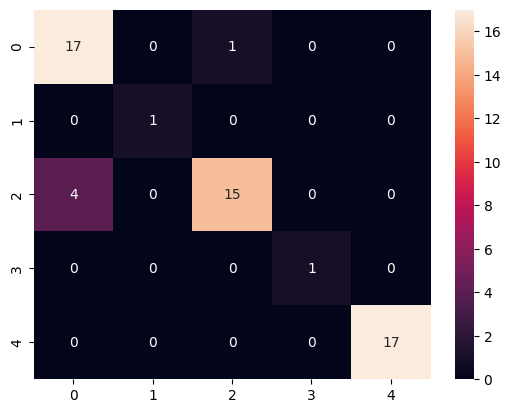

In [ ]:
acc = accuracy_score(y_test_dog_breed_new, y_pred_dog_breed_new)
print("Acurácia: ", acc)

precision = precision_score(y_test_dog_breed_new, y_pred_dog_breed_new,average='macro')
print("Precisão: ", precision)

cm_r1 = confusion_matrix(y_test_dog_breed_new, y_pred_dog_breed_new)
sns.heatmap(cm_r1, annot = True)
plt.show()

##*Random Forest* com *test_size = 0.3*

In [ ]:
# separando as variáveis independentes da variável dependente
X_dog_breed_new = dog_breed_new.drop('demeanor_category', axis=1)
y_dog_breed_new = dog_breed_new['demeanor_category']

# separando os dados em subconjuntos de treinamento e teste
X_train_dog_breed_new, X_test_dog_breed_new, y_train_dog_breed_new, y_test_dog_breed_new = train_test_split(X_dog_breed_new, y_dog_breed_new, test_size=0.3, random_state=42)

# exibindo os conjuntos de treinamento e teste
print('Train sample:')
print(X_train_dog_breed_new.head())

print('Train target:')
print(y_train_dog_breed_new.head())

print('Test sample:')
print(X_test_dog_breed_new.head())

Train sample:
     max_height  max_weight  min_expectancy  max_expectancy     group  \
38     0.030451    0.006509        0.083963        0.068786  0.040371   
200    0.033289    0.010668        0.062972        0.064487  0.026914   
143    0.041583    0.020431        0.062972        0.060188  0.000000   
57     0.056863    0.032726        0.062972        0.060188  0.067286   
266    0.041583    0.016454        0.062972        0.064487  0.080743   

     grooming_frequency_value  grooming_frequency_category  shedding_value  \
38                        0.6                     0.000000             0.5   
200                       0.4                     0.081548             0.6   
143                       0.4                     0.081548             0.4   
57                        0.6                     0.000000             0.6   
266                       0.6                     0.000000             0.4   

     shedding_category  energy_level_value  energy_level_category  \
38       

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_dog_breed_new, y_train_dog_breed_new)

DecisionTreeClassifier()

In [ ]:
y_pred_dog_breed_new = clf.predict(X_test_dog_breed_new)

Acurácia:  0.8690476190476191
Precisão:  0.9215384615384614


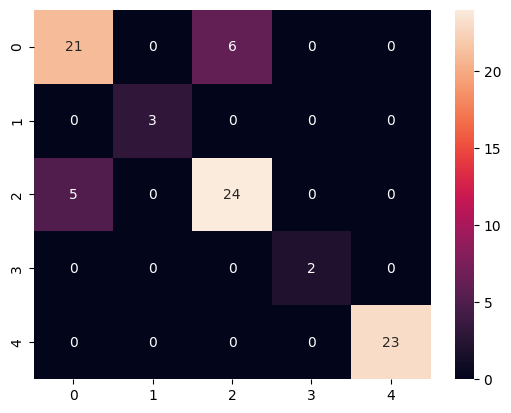

In [ ]:
acc = accuracy_score(y_test_dog_breed_new, y_pred_dog_breed_new)
print("Acurácia: ", acc)

precision = precision_score(y_test_dog_breed_new, y_pred_dog_breed_new,average='macro')
print("Precisão: ", precision)

cm_r2 = confusion_matrix(y_test_dog_breed_new, y_pred_dog_breed_new)
sns.heatmap(cm_r2, annot = True)
plt.show()

##*KNN* com *K* = 2

In [ ]:
# separando as variáveis independentes da variável dependente
X_dog_breed_new = dog_breed_new.drop('demeanor_category', axis=1)
y_dog_breed_new = dog_breed_new['demeanor_category']

# separando os dados em subconjuntos de treinamento e teste
X_train_dog_breed_new, X_test_dog_breed_new, y_train_dog_breed_new, y_test_dog_breed_new = train_test_split(X_dog_breed_new, y_dog_breed_new, test_size=0.2, random_state=42)

# exibindo os conjuntos de treinamento e teste
print('Train sample:')
print(X_train_dog_breed_new.head())

print('Train target:')
print(y_train_dog_breed_new.head())

print('Test sample:')
print(X_test_dog_breed_new.head())

Train sample:
     max_height  max_weight  min_expectancy  max_expectancy     group  \
259    0.031870    0.005786        0.068220        0.064487  0.094200   
124    0.088733    0.082087        0.052477        0.051589  0.107657   
33     0.072034    0.061475        0.062972        0.060188  0.013457   
86     0.070725    0.046829        0.052477        0.064487  0.000000   
263    0.066577    0.049180        0.062972        0.060188  0.067286   

     grooming_frequency_value  grooming_frequency_category  shedding_value  \
259                       0.4                     0.081548             0.4   
124                       0.4                     0.081548             0.6   
33                        0.6                     0.000000             0.6   
86                        0.4                     0.081548             1.0   
263                       0.4                     0.081548             0.6   

     shedding_category  energy_level_value  energy_level_category  \
259      

Acurácia: 0.75
Precisão: 0.46299999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


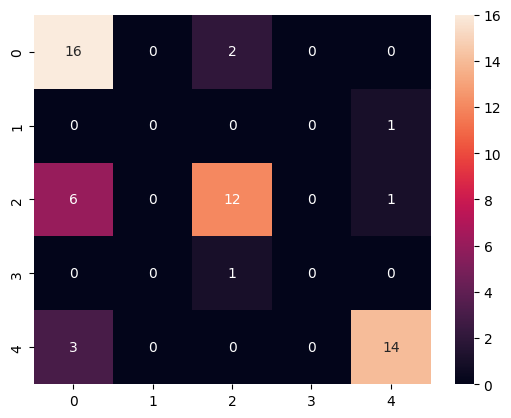

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2, algorithm='auto')
knn.fit(X_train_dog_breed_new, y_train_dog_breed_new)
resultKNN = knn.predict(X_test_dog_breed_new)

# calcula a acurácia, precisão e matriz de confusão
acc = accuracy_score(y_test_dog_breed_new, resultKNN)
prec = precision_score(y_test_dog_breed_new, resultKNN, average='macro')
cm_k1 = confusion_matrix(y_test_dog_breed_new, resultKNN)

# exibe as métricas
print('Acurácia:', acc)
print('Precisão:', prec)
sns.heatmap(cm_k1, annot = True)
plt.show()

##*KNN* com *K* = 3

In [ ]:
# separando as variáveis independentes da variável dependente
X_dog_breed_new = dog_breed_new.drop('demeanor_category', axis=1)
y_dog_breed_new = dog_breed_new['demeanor_category']

# separando os dados em subconjuntos de treinamento e teste
X_train_dog_breed_new, X_test_dog_breed_new, y_train_dog_breed_new, y_test_dog_breed_new = train_test_split(X_dog_breed_new, y_dog_breed_new, test_size=0.2, random_state=42)

# exibindo os conjuntos de treinamento e teste
print('Train sample:')
print(X_train_dog_breed_new.head())

print('Train target:')
print(y_train_dog_breed_new.head())

print('Test sample:')
print(X_test_dog_breed_new.head())

Train sample:
     max_height  max_weight  min_expectancy  max_expectancy     group  \
259    0.031870    0.005786        0.068220        0.064487  0.094200   
124    0.088733    0.082087        0.052477        0.051589  0.107657   
33     0.072034    0.061475        0.062972        0.060188  0.013457   
86     0.070725    0.046829        0.052477        0.064487  0.000000   
263    0.066577    0.049180        0.062972        0.060188  0.067286   

     grooming_frequency_value  grooming_frequency_category  shedding_value  \
259                       0.4                     0.081548             0.4   
124                       0.4                     0.081548             0.6   
33                        0.6                     0.000000             0.6   
86                        0.4                     0.081548             1.0   
263                       0.4                     0.081548             0.6   

     shedding_category  energy_level_value  energy_level_category  \
259      

Acurácia: 0.7857142857142857
Precisão: 0.4867395762132604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


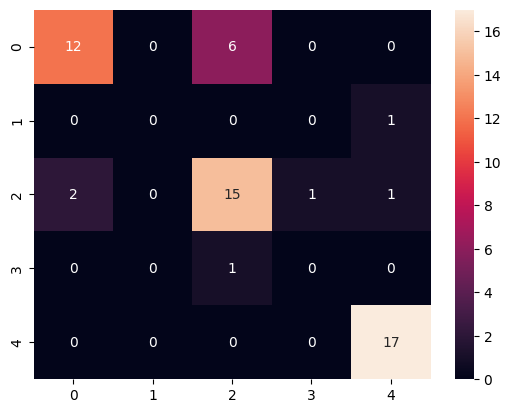

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn.fit(X_train_dog_breed_new, y_train_dog_breed_new)
resultKNN = knn.predict(X_test_dog_breed_new)

# calcula a acurácia, precisão e matriz de confusão
acc = accuracy_score(y_test_dog_breed_new, resultKNN)
prec = precision_score(y_test_dog_breed_new, resultKNN, average='macro')
cm_k2 = confusion_matrix(y_test_dog_breed_new, resultKNN)

# exibe as métricas
print('Acurácia:', acc)
print('Precisão:', prec)
sns.heatmap(cm_k2, annot = True)
plt.show()

##Respotas:



*   Sobre os métodos:

  1.  Escolhi o método *Random Forest* devido à sua interpretabilidade, capacidade de lidar com dados mistos, habilidade de capturar relações não lineares, robustez a outliers e eficiência computacional. Em outras palavras, foi devido à sua facilidade e interpretação simplificada. Dessa forma, ao analisar o problema, podemos verificar o passo a passo que foi executado, sem nos depararmos com uma "caixa preta".
  2.  Escolhi o método *KNN* por sua simplicidade e facilidade de implementação. Ele não requer uma fase de treinamento complexa, uma vez que todo o aprendizado é realizado durante a etapa de predição. Além disso, o KNN não é afetado por características irrelevantes e é capaz de se adaptar a diferentes formas de distribuição dos dados. Outro ponto positivo é que o KNN permite ajustar o valor de k para controlar o equilíbrio entre a flexibilidade e a suavidade das fronteiras de decisão.

*   Sobre os parâmetros:

  1.  No *Random Forest*, escolhi os seguintes parâmetros: *test_size=0.2, random_state=42*, ou seja, dividi o conjunto de dados em treinamento e teste na proporção de 80% e 20%, respectivamente, e escolhi o valor 42 como semente para garantir a reprodutibilidade dos resultados. No entanto, de acordo com as especificações da questão, alterei a divisão para 70% para treinamento e 30% para teste para ter outro resultado diferente.
  2.   No *KNN*, escolhi os seguintes parâmetros: *test_size=0.2, random_state=42, n_neighbors=2*, ou seja, dividi o conjunto de dados em treinamento e teste na proporção de 80% e 20%, respectivamente, e escolhi o valor 42 como semente para garantir a reprodutibilidade dos resultados. Além disso, defini o número de vizinhos próximos como 2. No entanto, de acordo com as especificações da questão, alterei o número de vizinhos próximos para 3, obtendo um resultado diferente.

*   Sobre os valores:

  1.   Valores obtidos para o *Random Forest* com *test_size* 0.2:
                
                Acurácia =   0.9107142857142857
                Precisão =  0.9494047619047619

  2.   Valores obtidos para o *Random Forest* com *test_size* 0.3:

                Acurácia:  0.8809523809523809
                Precisão:  0.9284802043422733

  3.   Valores obtidos para o *KNN* com *K* = 2:
  
                Acurácia: 0.75
                Precisão: 0.46299999999999997

  4.   Valores obtidos para o *KNN* com *K* = 3:
  
                Acurácia: 0.7857142857142857
                Precisão: 0.4867395762132604











#Questão 5

##Utilzando *K-means* *n_clusters* = 3

In [ ]:
# Criar uma instância do K-means
kmeans = KMeans(n_clusters=3)

# Ajustar o modelo aos dados
kmeans.fit(dog_breed_new)

# Obter as etiquetas dos clusters atribuídas pelo modelo
labels = kmeans.labels_

# Calcular as métricas de avaliação
silhouette = silhouette_score(dog_breed_new, labels)
davies_bouldin = davies_bouldin_score(dog_breed_new, labels)

print("Coeficiente de Silhueta:", silhouette)
print("Índice de Davies-Bouldin:", davies_bouldin)


Coeficiente de Silhueta: 0.6632619522097655
Índice de Davies-Bouldin: 0.4624233982560814


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Utilzando *K-means* *n_clusters* = 5

In [ ]:
# Criar uma instância do K-means
kmeans = KMeans(n_clusters=5)

# Ajustar o modelo aos dados
kmeans.fit(dog_breed_new)

# Obter as etiquetas dos clusters atribuídas pelo modelo
labels = kmeans.labels_

# Calcular as métricas de avaliação
silhouette = silhouette_score(dog_breed_new, labels)
davies_bouldin = davies_bouldin_score(dog_breed_new, labels)

print("Coeficiente de Silhueta:", silhouette)
print("Índice de Davies-Bouldin:", davies_bouldin)


Coeficiente de Silhueta: 0.5749135338279752
Índice de Davies-Bouldin: 0.6726821788585368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Confesso que não tinha muito conhecimento das méticas de avaliação dos modelos não supervisionados então utilizei esses que encontrei, além de deixar uma breve explicação aqui para futuras consultas:

  1. Coeficiente de Silhueta: O coeficiente de silhueta mede o quão bem cada amostra se encaixa no seu próprio cluster em comparação com outros clusters. Varia entre -1 e 1, onde valores mais próximos de 1 indicam uma boa separação entre os clusters.

  2. Índice de Davies-Bouldin: Essa métrica avalia a similaridade entre os clusters com base nas distâncias médias entre os centroides e a dissimilaridade média entre os clusters. Valores mais baixos indicam clusters mais coesos e bem separados.

##Utilzando *Hierárquico* *n_clusters* = 3

In [ ]:
h_tres = AgglomerativeClustering(n_clusters = 3)

h_tres.fit(dog_breed_new)

print(f"Coeficiente de Silhueta: {silhouette_score(dog_breed_new, h_tres.labels_)}")

print(f"Índice de Davies-Bouldin: {davies_bouldin_score(dog_breed_new, h_tres.labels_)}")


Coeficiente de Silhueta: 0.6632619522097655
Índice de Davies-Bouldin: 0.4624233982560814


##Utilzando *Hierárquico* *n_clusters* = 5

In [ ]:
h_cinco = AgglomerativeClustering(n_clusters = 5)
h_cinco.fit(dog_breed_new)
print(f"Coeficiente de Silhueta: {silhouette_score(dog_breed_new, h_cinco.labels_)}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_score(dog_breed_new, h_cinco.labels_)}")

Coeficiente de Silhueta: 0.5749135338279752
Índice de Davies-Bouldin: 0.6726821788585368


##Respostas



*   Sobre os métodos:

  1.  Escolhi o método *K-Means* por ser um algoritmo relativamente simples de entender e implementar. Ele segue uma abordagem intuitiva de agrupamento, em que os dados são agrupados em clusters com base em sua similaridade. Além disso, é fácil de interpretar, uma vez que cada cluster é representado pelo seu centróide, que corresponde ao ponto médio dos membros do cluster. Isso possibilita uma compreensão visual dos grupos formados e pode ser útil na análise e interpretação dos resultados.

  2.  Escolhi o método *Hierárquico* porque o agrupamento hierárquico produz uma estrutura de agrupamento em forma de árvore, na qual os clusters são organizados hierarquicamente. Isso proporciona uma visualização clara das relações de similaridade entre os dados em diferentes níveis de agrupamento, o que pode ser útil para interpretação e análise dos resultados. Além disso, o agrupamento hierárquico preserva as informações sobre a similaridade entre todos os pares de pontos nos dados, o que pode ser vantajoso para análises posteriores, como a identificação de padrões ou a seleção de subconjuntos de dados com base em critérios específicos.

*   Sobre os parâmetros:

  1.  No *K-means*, escolhi o seguinte parâmetro: *n_clusters=3*, ou seja, significa que defini três clusters como o número desejado de grupos para agrupar os dados. Essa configuração especifica que o algoritmo irá dividir os dados em três grupos distintos com base na similaridade dos pontos em relação aos centróides dos clusters. No entanto, de acordo com as especificações da questão, alterei o número de clusters para 5, para obter um resultado diferente.

  2.   No *Hierárquico*, escolhi o seguinte parâmetro: *n_clusters=3*. Isso significa que optei por ter 3 clusters como resultado do agrupamento hierárquico. O algoritmo irá agrupar os dados em três grupos distintos com base nas medidas de similaridade ou dissimilaridade entre eles. Cada cluster representará um conjunto de dados com características semelhantes entre si. No entanto, de acordo com as especificações da questão, alterei o número de clusters para 5, com o objetivo de obter um resultado diferente.

*   Sobre os valores:

  1.   Valores obtidos para o *K-Means* com *n_clusters* = 3:
                
                Coeficiente de Silhueta: 0.6632619522097655
                Índice de Davies-Bouldin: 0.4624233982560814

  2.   Valores obtidos para o *K-Means* com *n_clusters* = 5:

                Coeficiente de Silhueta: 0.5749135338279752
                Índice de Davies-Bouldin: 0.6726821788585368

  3.   Valores obtidos para o *Hierárquico* com *n_clusters* = 3:
  
                Coeficiente de Silhueta: 0.6632619522097655
                Índice de Davies-Bouldin: 0.4624233982560814

  4.   Valores obtidos para o *Hierárquico* com *n_clusters* = 5:
  
                Coeficiente de Silhueta: 0.5749135338279752
                Índice de Davies-Bouldin: 0.6726821788585368











#Questão 6

##Comparação do item 3 utilizando duas métricas

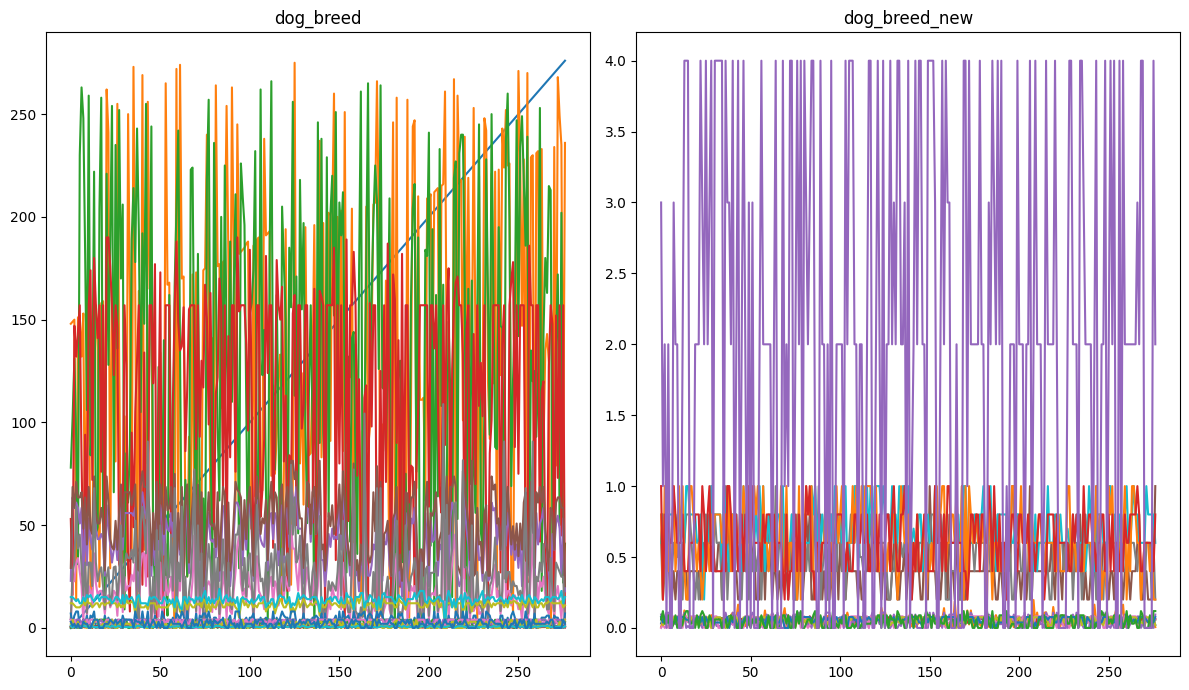

In [ ]:
# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

# Plotagem do primeiro gráfico no primeiro subplot
axs[0].plot(dog_breed)
axs[0].set_title('dog_breed')

# Plotagem do segundo gráfico no segundo subplot
axs[1].plot(dog_breed_new)
axs[1].set_title('dog_breed_new')

# Ajuste os espaçamentos entre os subplots
plt.tight_layout()

# Exiba a figura com os gráficos
plt.show()

* No gráfico acima, podemos observar a relação entre os atributos e suas variações. No primeiro gráfico, antes da redução de dimensionalidade e normalização dos dados, é perceptível que ele é extremamente confuso e difícil de analisar. Além disso, apresenta informações irrelevantes, como a reta em azul que possui um valor diferente para cada uma das 277 raças. No segundo gráfico, por outro lado, podemos notar uma melhora significativa. Ele se tornou mais "legível" e uniforme em comparação ao primeiro. Os valores normalizados estão mais organizados e a única discrepância notável é no atributo alvo que foi escolhido.

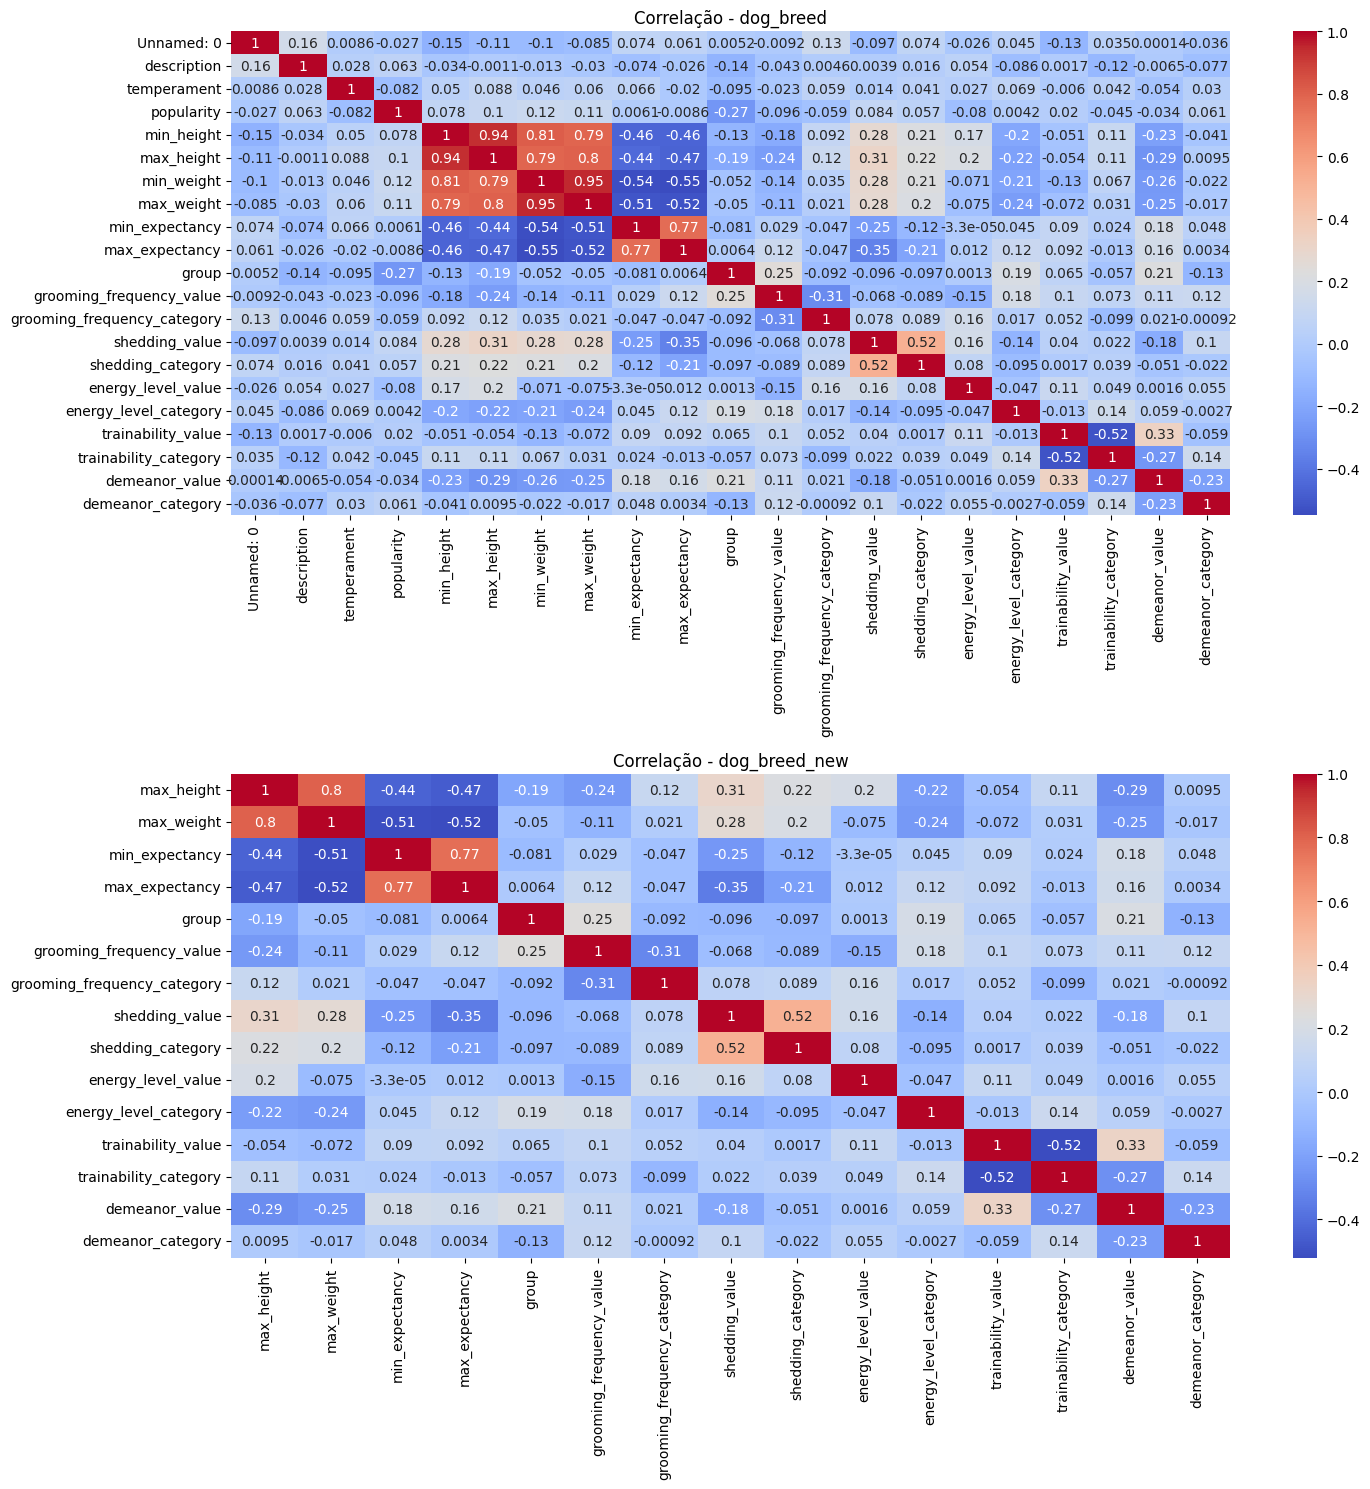

In [ ]:
# Carregar os dados e calcular as matrizes de correlação
dados1 = dog_breed
dados2 = dog_breed_new
corr1 = dados1.corr()
corr2 = dados2.corr()

# Criar a figura e os subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Plotar o primeiro gráfico de correlação
sns.heatmap(corr1, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlação - dog_breed")

# Plotar o segundo gráfico de correlação
sns.heatmap(corr2, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlação - dog_breed_new")

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


* Nas tabelas de correlação acima, é perceptível como a redução de dimensionalidade tornou os dados mais fáceis de serem analisados e compreendidos, ao contrário da confusão presente na primeira tabela.

* Os gráficos de variação de valores são úteis para identificar outliers, que são pontos de dados incomuns ou discrepantes. Esses outliers podem indicar erros de medição, registros incorretos ou comportamentos anômalos. A detecção dessas anomalias é importante para investigar e corrigir possíveis problemas nos dados. Além disso, os gráficos e tabelas de correlação permitem que os analistas tomem decisões informadas sobre a análise dos dados. Isso inclui a identificação de atributos altamente correlacionados e a remoção deles para evitar multicolinearidade em modelos preditivos. Também é possível detectar padrões e tendências, fornecendo insights valiosos para orientar estratégias de negócios, identificar oportunidades e mitigar riscos.

##Comparação do item 4 utilizando duas métricas

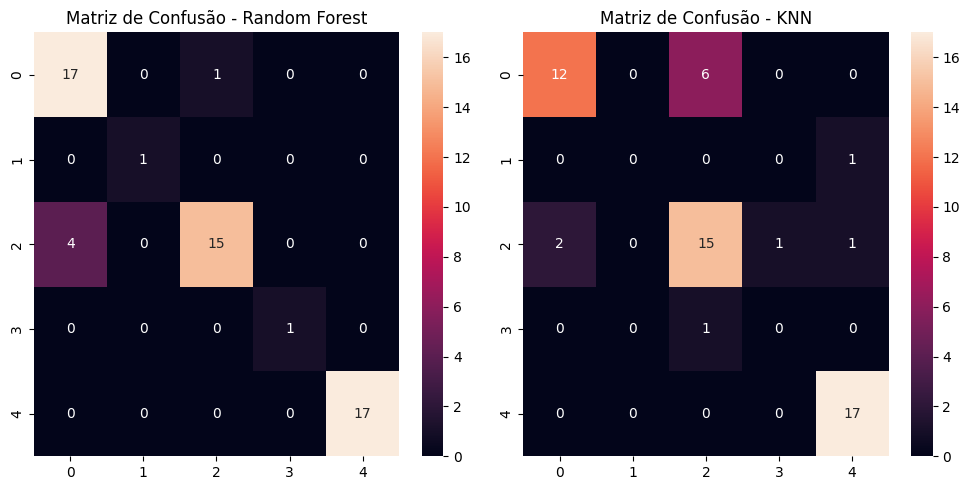

In [ ]:
# Criar a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotar o primeiro gráfico de correlação
sns.heatmap(cm_r1, annot=True, ax=axes[0])
axes[0].set_title("Matriz de Confusão - Random Forest")

# Plotar o segundo gráfico de correlação
sns.heatmap(cm_k2, annot=True, ax=axes[1])
axes[1].set_title("Matriz de Confusão - KNN")

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


* Nas duas tabelas acima, é possível observar as matrizes de confusão dos dois métodos de aprendizagem de máquina supervisionada escolhidos para resolver esta questão. Essas matrizes representam os melhores resultados obtidos após a realização de dois testes, nos quais um parâmetro foi alterado para cada método. Podemos notar que a árvore de decisão foi o método que obteve o melhor resultado entre os selecionados.

1.   Valores obtidos para o *Random Forest*:
                
                Acurácia:   0.9107142857142857
                Precisão:   0.9494047619047619

2.   Valores obtidos para o *KNN*:
  
                Acurácia: 0.7857142857142857
                Precisão: 0.4867395762132604

* Com os resultados apresentados acima, é possível observar com maior clareza a eficácia do *Random Forest* para esse caso. Ele apresenta maior acurácia e precisão em comparação ao *KNN*.

* O uso das métricas matriz de confusão, acurácia e precisão permite avaliar o desempenho e a qualidade das previsões realizadas pelos modelos *Random Forest* e *KNN*. Essas métricas fornecem informações valiosas sobre a capacidade de generalização dos modelos, a taxa de acerto das previsões, a capacidade de evitar falsos positivos e a distribuição dos resultados por classe. Com base nessas métricas, é possível comparar o desempenho de diferentes modelos, ajustar parâmetros e tomar decisões fundamentadas sobre a escolha do melhor modelo para um determinado problema.

##Comparação do item 5 utilizando duas métricas

  1.   Valores obtidos para o *K-Means* com *n_clusters* = 3:
                
                Coeficiente de Silhueta: 0.6632619522097655
                Índice de Davies-Bouldin: 0.4624233982560814

  2.   Valores obtidos para o *Hierárquico* com *n_clusters* = 3:
  
                Coeficiente de Silhueta: 0.6632619522097655
                Índice de Davies-Bouldin: 0.4624233982560814

* Nos resultados acima, é possível perceber que os dois métodos de aprendizagem de máquina não supervisionada apresentaram valores idênticos.

* Utilizar as métricas Coeficiente de Silhueta e Índice de Davies-Bouldin é uma opção adequada para avaliar a qualidade e consistência dos agrupamentos gerados pelos algoritmos *Hierárquico* e *K-means*. Essas métricas são úteis para entender a separação entre os clusters, a coesão interna de cada cluster e a adequação dos parâmetros utilizados nos algoritmos. Com base nessas métricas, é possível comparar diferentes abordagens de agrupamento, determinar o número ideal de clusters e aprimorar a qualidade dos resultados obtidos.